In [1]:
import numpy 
from matplotlib import pyplot, animation, rcParams
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from IPython.display import HTML

In [2]:
# parameters
nx = 81      # number of x-intervals
nt = 80      # number of time intervals
sigma = 0.5  # CFL number
c  = 1.      # wave speed
dx = 4.0/(nx-1)
dt = sigma * dx/c

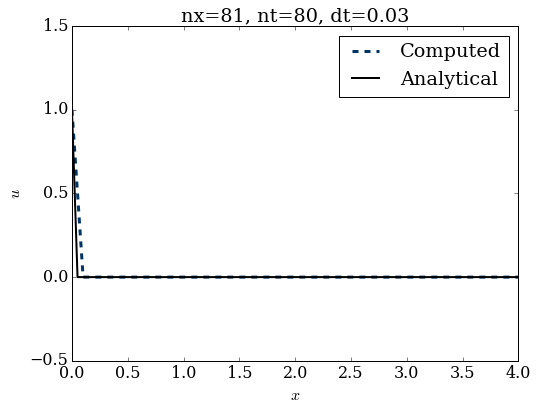

In [3]:
# initialization
x =  numpy.arange(0,4+dx,dx)
u =  numpy.zeros(nx)
un = numpy.zeros(nx)

u[0] = 1      # sets the LHS value to 1
un[0] = 1

# create initial plot lines        
fig = pyplot.figure(figsize=(8,6))
ax = pyplot.axes(xlim=(0, 4), ylim=(-0.5, 1.5))
line1 = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
line2 = ax.plot([], [],'k-', lw=2)[0]
ax.legend(['Computed', 'Analytical'])

pyplot.xlabel('$x$')
pyplot.ylabel('$u$')
pyplot.title('nx='+str(nx)+', nt='+str(nt)+', dt='+str(round(dt, 2)), family='serif')

def foupwind(n):
    un = u.copy()
    for i in range(1,nx):
        # backward difference
        u[i] = un[i]- sigma*( un[i]- un[i-1] )
        # central difference
        #u[i] = un[i]- sigma/2*( un[i+1]- un[i-1] )
    u[0] = 1
    line1.set_data(x, u)
    line2.set_data(x, numpy.where(x < c*(n+1)*dt, numpy.ones(nx),numpy.zeros(nx) ) )
    
anim = animation.FuncAnimation(fig, foupwind, frames=nt, interval=50)

In [4]:
HTML(anim.to_html5_video())

## Lax-Friedrichs

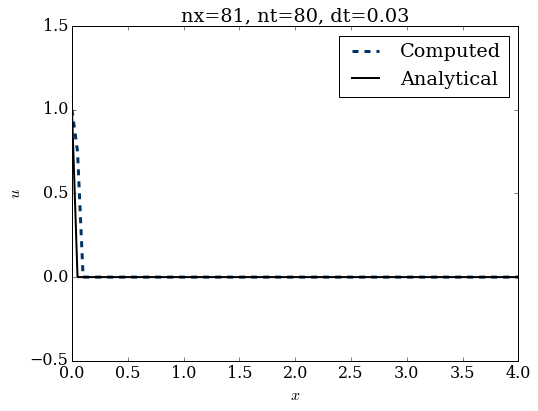

In [5]:
# initialization
x =  numpy.arange(0,4+dx,dx)
u =  numpy.zeros(nx)
un = numpy.zeros(nx)

u[0] = 1      # sets the LHS value to 1
un[0] = 1

# create initial plot lines        
fig = pyplot.figure(figsize=(8,6))
ax = pyplot.axes(xlim=(0, 4), ylim=(-0.5, 1.5))
line1 = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
line2 = ax.plot([], [],'k-', lw=2)[0]
ax.legend(['Computed', 'Analytical'])

pyplot.xlabel('$x$')
pyplot.ylabel('$u$')
pyplot.title('nx='+str(nx)+', nt='+str(nt)+', dt='+str(round(dt, 2)), family='serif')

def Lax_Friedrichs(n):
    un = u.copy()
    for i in range(1,nx-1):
        # Lax-Friedrichs
        u[i] = 1/2*(un[i+1] + un[i-1]) - c*dt/(2*dx)*(un[i+1] - un[i-1])
    u[0] = 1
    line1.set_data(x, u)
    line2.set_data(x, numpy.where(x < c*(n+1)*dt, numpy.ones(nx),numpy.zeros(nx) ) )
    
anim = animation.FuncAnimation(fig, Lax_Friedrichs, frames=nt, interval=50)

In [6]:
HTML(anim.to_html5_video())

Now there is a wiggle in the error. It is also diffusing in front of and behind the wave. Odd-even decoupling.

## Lax-Wendroff

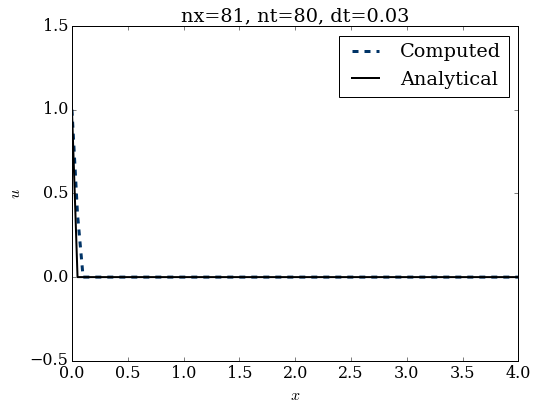

In [7]:
# initialization
x =  numpy.arange(0,4+dx,dx)
u =  numpy.zeros(nx)
un = numpy.zeros(nx)

u[0] = 1      # sets the LHS value to 1
un[0] = 1

# create initial plot lines        
fig = pyplot.figure(figsize=(8,6))
ax = pyplot.axes(xlim=(0, 4), ylim=(-0.5, 1.5))
line1 = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
line2 = ax.plot([], [],'k-', lw=2)[0]
ax.legend(['Computed', 'Analytical'])

pyplot.xlabel('$x$')
pyplot.ylabel('$u$')
pyplot.title('nx='+str(nx)+', nt='+str(nt)+', dt='+str(round(dt, 2)), family='serif')

def Lax_Wendroff(n):
    un = u.copy()
    for i in range(1,nx-1):
        # Lax-Wendroff
        u[i] = un[i] - sigma/2*(un[i+1] - un[i-1]) + sigma**2/2*(un[i+1] - 2*un[i] + un[i-1])
    u[0] = 1
    line1.set_data(x, u)
    line2.set_data(x, numpy.where(x < c*(n+1)*dt, numpy.ones(nx),numpy.zeros(nx) ) )
    
anim = animation.FuncAnimation(fig, Lax_Wendroff, frames=nt, interval=50)

In [8]:
HTML(anim.to_html5_video())

Now the wiggle is at the top of the wave and grows over time

## Leapfrog scheme

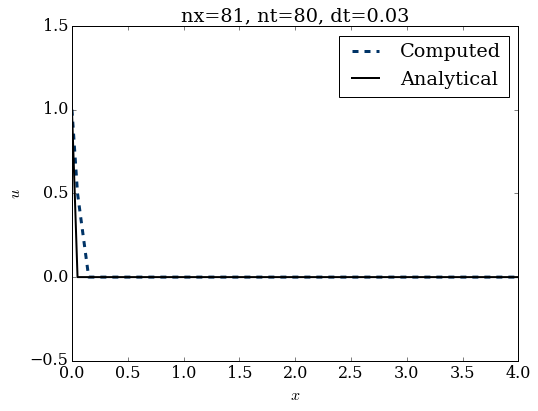

In [15]:
# initialization
x =  numpy.arange(0,4+dx,dx)
u =  numpy.zeros(nx)
un = numpy.zeros(nx)
unminus1 = numpy.zeros(nx)
u[0]  = 1          # sets the rhs value to 1
un[0] = 1
unminus1[0] = 1

# create initial plot lines        
fig = pyplot.figure(figsize=(8,6))
ax = pyplot.axes(xlim=(0, 4), ylim=(-0.5, 1.5))
line1 = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
line2 = ax.plot([], [],'k-', lw=2)[0]
ax.legend(['Computed', 'Analytical'])

pyplot.xlabel('$x$')
pyplot.ylabel('$u$')
pyplot.title('nx='+str(nx)+', nt='+str(nt)+', dt='+str(round(dt, 2)), family='serif')

for i in range(1,nx):
# backward difference for first step in time
    u[i] = un[i] - sigma*( un[i]- un[i-1] )

def leapfrog(n, un, unminus1, u):
    un = u.copy()
    for i in range(1,nx-1):
        # leapfrog
        u[i] = unminus1[i]- sigma*( un[i+1]- un[i-1] )
    u[0] = 1
    unminus1 = un.copy()
    line1.set_data(x, u)
    line2.set_data(x, numpy.where(x < c*(n+1)*dt, numpy.ones(nx),numpy.zeros(nx) ) )
    
anim = animation.FuncAnimation(fig, leapfrog, frames=nt, fargs=(un, unminus1, u), interval=50)

In [16]:
HTML(anim.to_html5_video())